In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier

<div id="about_dataset">
    <h2>About the dataset</h2>
    Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y. 
    <br>
    <br>
    Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.
    <br>
    <br>
    It is a sample of multiclass classifier, and you can use the training part of the dataset 
    to build a decision tree, and then use it to predict the class of an unknown patient, or to prescribe a drug to a new patient.
</div>


In [4]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'
df = pd.read_csv(url)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [6]:
df.shape

(200, 6)

In [7]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [14]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


## Pre-processing

Using <b>my_data</b> as the Drug.csv data read by pandas, declare the following variables: <br>

<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of my_data) </li>
    <li> <b> y </b> as the <b> response vector </b> (target) </li>
</ul>

In [38]:
x = df[['Age','Sex','BP','Cholesterol','Na_to_K']].values
x[0:4]


array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798]], dtype=object)

In [39]:
print(len(x.shape))

2


In [40]:
y[0:4]

0    drugY
1    drugC
2    drugC
3    drugX
Name: Drug, dtype: object

In [41]:
df['Sex'].unique()

array(['F', 'M'], dtype=object)

In [42]:
df['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [43]:
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
# convert these features to numerical values
le_sex = LabelEncoder()
le_sex.fit(['F', 'M'])
x[:,1] = le_sex.transform(x[:,1])

le_BP = LabelEncoder()
le_BP.fit(['LOW','HIGH','NORMAL'])
x[:,2] = le_BP.transform(x[:,2])

le_Chol= LabelEncoder()
le_Chol.fit(['HIGH','NORMAL'])
x[:,3] = le_Chol.transform(x[:,3])

x[0:4]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798]], dtype=object)

In [46]:
y = df['Drug']
y[0:4]

0    drugY
1    drugC
2    drugC
3    drugX
Name: Drug, dtype: object

## The decision tree

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)
print('train datasets = ', x_train.shape[0])
print('test datasets = ', x_test.shape[0])

train datasets =  140
test datasets =  60


In [59]:
DrugTree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
DrugTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [60]:
DrugTree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [61]:
PredTree = DrugTree.predict(x_test)
PredTree[0:4]

array(['drugC', 'drugX', 'drugY', 'drugY'], dtype=object)

In [62]:
# evaluate the model 
from sklearn import metrics
accuracy_score = metrics.accuracy_score(y_test,PredTree)
print('The accuracy score of the model is: ', accuracy_score)

The accuracy score of the model is:  1.0


*Accuracy classification score computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0*

### Visulization

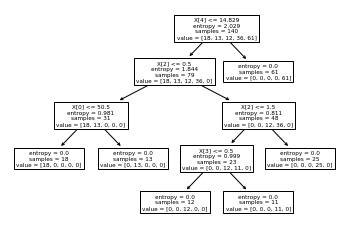

In [64]:
tree.plot_tree(DrugTree)
plt.show()